In [26]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [93]:
X, y = make_blobs(n_samples = 600, n_features = 2, centers = 3, random_state = 23)

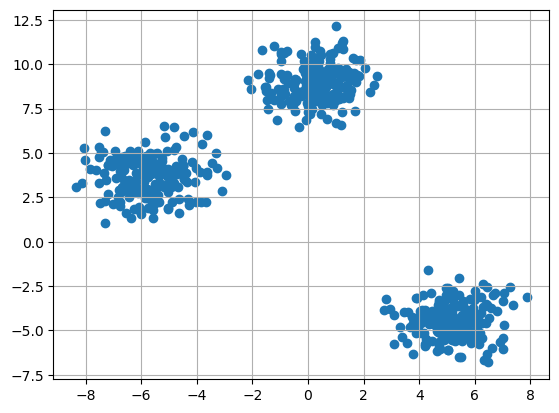

In [94]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [95]:
2*(2*np.random.random()-1)

1.9093487531808764

In [96]:
k = 3
clusters = {}
# Make sure numpy random good 
# np.random.seed(23)

for index in range(k):
    centroid = 2*(2*np.random.random(X.shape[1],)-1)
    points = []
    cluster = {
        'centroid': centroid,
        'points': []
    }
    clusters[index] = cluster 

In [97]:
clusters

{0: {'centroid': array([-0.87506554,  1.28418043]), 'points': []},
 1: {'centroid': array([-1.99433578, -1.39147356]), 'points': []},
 2: {'centroid': array([1.51487068, 1.58849783]), 'points': []}}

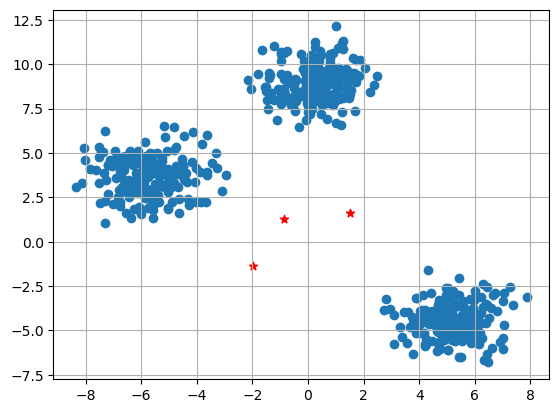

In [98]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['centroid']
    plt.scatter(center[0],center[1], marker = '*', c='red')
plt.show()

In [99]:
def assign_clusters(X, clusters):
    for index in range(X.shape[0]):
        dist = []
        cur_x = X[index]
        for i in range(k):
            distance = np.sqrt(np.sum((cur_x - clusters[i]['centroid'])**2))
            dist.append(distance)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(cur_x)
    return clusters

In [100]:
# Update cluster' centorid 
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_centroid = points.mean(axis = 0)
            clusters[i]['centroid'] = new_centroid
            clusters[i]['points'] = []
    return clusters

In [101]:
for i in range(1000):
    clusters = assign_clusters(X, clusters)
    clusters = update_clusters(X, clusters)

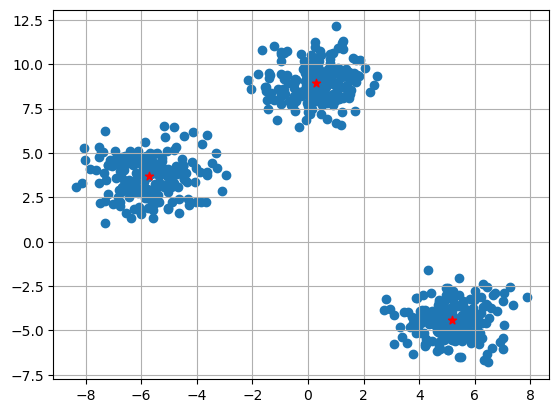

In [103]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['centroid']
    plt.scatter(center[0],center[1], marker = '*', c='red')
plt.show()

In [104]:
def predict_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(np.sqrt(np.sum((X[i] - clusters[j]['centroid'])**2)))
        pred.append(np.argmin(dist))
    return pred

In [105]:
predic = predict_cluster(X, clusters)

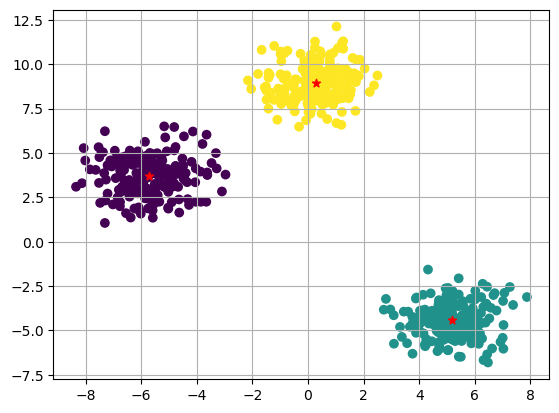

In [106]:
plt.scatter(X[:,0],X[:,1], c = predic)
plt.grid(True)
for i in clusters:
    center = clusters[i]['centroid']
    plt.scatter(center[0],center[1], marker = '*', c='red')
plt.show()